# HW3: Part 1a. Pure Numpy Neural Network Implementation

##CMPE-258: Deep Learning, Vijay Eranti
##Samer Baslan
##SJSU Spring 2021

#Reference: https://colab.research.google.com/drive/1HS3qbHArkqFlImT2KnF5pcMCz7ueHNvY?usp=sharing#scrollTo=sqVW5Nezc8GZ

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

# Regression with a Linear Model

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


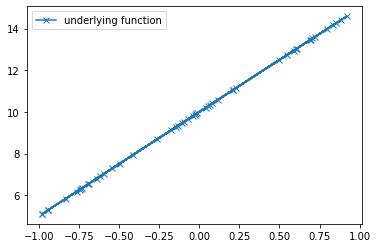

In [ ]:
# x 1-dimensional
n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

#y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker = 'x', label = 'underlying function')
plt.legend()

# Linear prediction function

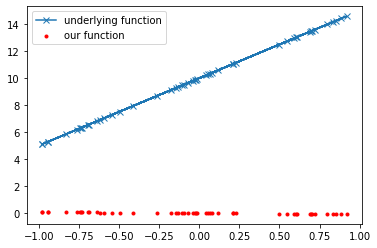

In [ ]:
class Linear:
  def __init__(self, input_dim, num_hidden = 1):
    
    #It is important that the initialization deals with different input sizes properly,
    #otherwise gradients quickly go to 0
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    return x @ self.weights + self.bias


linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker = 'x', label = 'underlying function')
plt.scatter(x, y_pred, color = 'r', marker = '.', label = 'our function')
plt.legend()

##MSE loss function

In [ ]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()

loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 103.78463267134012


##Backpropagation

In [ ]:
# Use gradient descent to learn the weights and bias that minimize the loss function
# For this, we need the gradient of the loss function and the gradients of the linear function

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    #print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  #input_dim is the parameter that is entered when you call the function
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis = 0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
#Take one step forward and one step backward to make sure nothing breaks,
#and that loss decreases

loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

101.71030022638715
66.78983899792374


#Train using gradient descent

Epoch 0, loss 99.83780725520732
Epoch 5, loss 12.174813532044423
Epoch 10, loss 2.067340278447524
Epoch 15, loss 0.6039745725131472
Epoch 20, loss 0.2553005371423313
Epoch 25, loss 0.12220252856595877
Epoch 30, loss 0.06028278921151396
Epoch 35, loss 0.029935501084280332


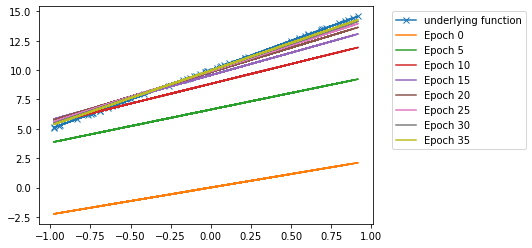

In [ ]:
plt.plot(x, y_true, marker = 'x', label = 'underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}') #squeeze remove axes of length one

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left');

#Now with 2d inputs

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


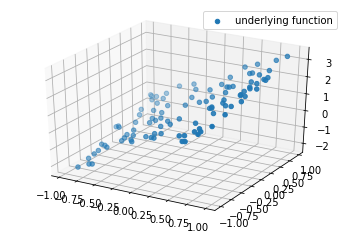

In [ ]:
n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * * x_1 + b
# y = w@x + b

weights_true = np.array([[2,1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred = None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection = '3d')
  ax.scatter(x[:, 0], x[:, 1], y, label = 'underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label = 'our function')
  plt.legend()

plot_3d(x, y_true)

2.6953674187743184


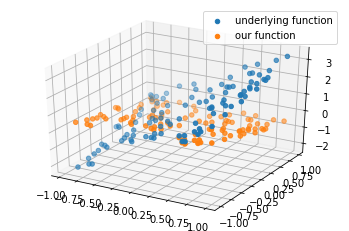

In [ ]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 2.6953674187743184
Epoch 1, loss 2.194707446677963
Epoch 2, loss 1.8104025078186425
Epoch 3, loss 1.509350142623391
Epoch 4, loss 1.2691645345104554
Epoch 5, loss 1.0744741742898567
Epoch 6, loss 0.9145359650459253
Epoch 7, loss 0.7816919771588868
Epoch 8, loss 0.6703664370355145
Epoch 9, loss 0.5764097916891856
Epoch 10, loss 0.49666636774155193
Epoch 11, loss 0.4286865937967934
Epoch 12, loss 0.370533126277899
Epoch 13, loss 0.32064833886752253
Epoch 14, loss 0.2777622185540373
Epoch 15, loss 0.24082712382445962
Epoch 16, loss 0.20897061141724868
Epoch 17, loss 0.18146058905252857
Epoch 18, loss 0.1576790160326847
Epoch 19, loss 0.1371016428133761


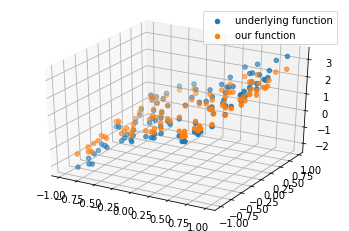

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model = linear, loss = loss, lr = 0.1, num_epochs = 20)
plot_3d(x, y_true, linear(x))

# Basic regression with a Multi-Layer Perceptron (3 layers)

We can now automatically fit a linear function to N-dimensional data.
Now we must make this work for non-linear data

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


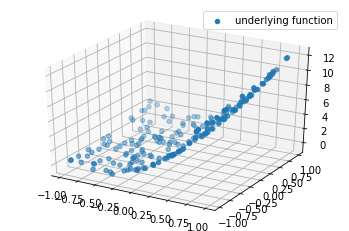

In [ ]:
# Make non-linear data

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 25.827061408160745
Epoch 1, loss 20.365991217472846
Epoch 2, loss 16.444299515479134
Epoch 3, loss 13.56831270066728
Epoch 4, loss 11.413624048408714
Epoch 5, loss 9.765292933727292
Epoch 6, loss 8.479437172804094
Epoch 7, loss 7.458526390287115
Epoch 8, loss 6.635455709857306
Epoch 9, loss 5.963251139714014
Epoch 10, loss 5.408391235356845
Epoch 11, loss 4.946454390204953
Epoch 12, loss 4.559264730200805
Epoch 13, loss 4.233006237339103
Epoch 14, loss 3.956964598953405
Epoch 15, loss 3.7226778617304466
Epoch 16, loss 3.523354868786303
Epoch 17, loss 3.353470408449341
Epoch 18, loss 3.208478065747983
Epoch 19, loss 3.084602376481237
Epoch 20, loss 2.9786851549672146
Epoch 21, loss 2.8880694333857466
Epoch 22, loss 2.810509998308735
Epoch 23, loss 2.7441031175183115
Epoch 24, loss 2.687230408725036
Epoch 25, loss 2.6385133543938046
Epoch 26, loss 2.596775997869538
Epoch 27, loss 2.561014048028078
Epoch 28, loss 2.530369090313103
Epoch 29, loss 2.5041069270786624
Epoch 30, 

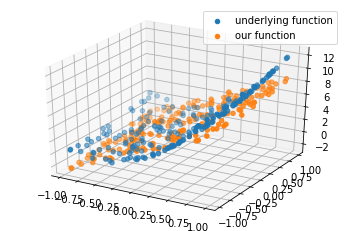

In [ ]:
#We can train just fine, but the final loss will remain high, as our linear function
#is incapable of representing the data.

loss = MSE()
linear = Linear(d)
fit(x, y_true, model = linear, loss = loss, lr = 0.1, num_epochs = 40)
plot_3d(x, y_true, linear(x))

#Add non-linearity: ReLU

In [ ]:
#To learn non-linear functions, we need non-linearities in our model

class Relu:
  def __call__(self, input_):
    self.input_ = input_
    self.output = np.clip(self.input_, 0, None)
    return self.output

  def backward(self, output_gradient):
    #pdb.set_trace() #for debugging purposes
    self.input_gradient = (self.input_ > 0) * output_gradient
    return self.input_gradient

In [ ]:
relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


# Train our new non-linear model

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, num_hidden)
    self.relu2 = Relu()
    self.linear3 = Linear(num_hidden, 1)

  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    r2 = self.relu(l2)
    l3 = self.linear3(r2)
    return l3

  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu_gradient = self.relu.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear3_gradient.shape, relu_gradient.shape, linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)

    return linear1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

29.61188926945666


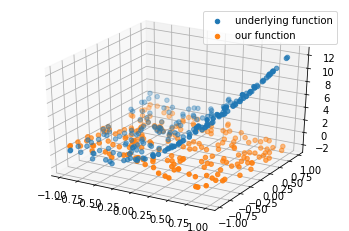

In [ ]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [ ]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

24.517051879018883
9.734801349049322


Epoch 0, loss 9.734801349049322
Epoch 1, loss 3.2061083727397603
Epoch 2, loss 1.0797661081102234
Epoch 3, loss 0.8373251619318208
Epoch 4, loss 0.8748582336871056
Epoch 5, loss 0.7829962825276957
Epoch 6, loss 1.0549411550275887
Epoch 7, loss 1.304689260446735
Epoch 8, loss 1.4603916886495407
Epoch 9, loss 2.4209955238134837
Epoch 10, loss 1.7179976879123593
Epoch 11, loss 3.0560299296909825
Epoch 12, loss 1.5383757839276142
Epoch 13, loss 2.478932445416978
Epoch 14, loss 1.5273863235986676
Epoch 15, loss 2.4822459593298367
Epoch 16, loss 1.5579818900639637
Epoch 17, loss 2.6202392790350997
Epoch 18, loss 1.5901764628111676
Epoch 19, loss 2.733152636237802
Epoch 20, loss 1.5708692723301767
Epoch 21, loss 2.7188929756421025
Epoch 22, loss 1.5940678630415972
Epoch 23, loss 2.8273865185666387
Epoch 24, loss 1.5754402250589408
Epoch 25, loss 2.7805999358233318
Epoch 26, loss 1.5820973375180754
Epoch 27, loss 2.825733040326843
Epoch 28, loss 1.5722239582285777
Epoch 29, loss 2.817653520029

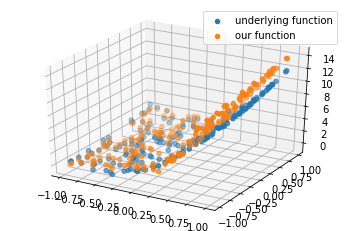

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))